In [37]:
import cv2
import os
import numpy as np
import PIL
import matplotlib.pyplot as plt

# Problem 1

In [4]:
def distance ( x, y):
    return np.abs( x - y )

In [6]:
def pixel_wise_matching_l1(file_path, disparity_range = 16, save_result = True ):
    left_img_path = os.path.join(file_path,"left.png")
    right_img_path = os.path.join(file_path,"right.png")
    left_img = cv2.imread(left_img_path,cv2.IMREAD_GRAYSCALE).astype(np.float32)
    right_img = cv2.imread(right_img_path,cv2.IMREAD_GRAYSCALE).astype(np.float32)
    height, width = left_img.shape
    depth_matrix = np.zeros((height,width),dtype=np.uint8)
    scale = 16
    max_value = 255
    for h in range(height):
        for w in range(width):
            cost = []
            for d in range(disparity_range):
                if w - d < 0:
                    cost.append( max_value ) 
                else:
                    cost.append(distance(left_img[h,w], right_img[h,w-d]))
            depth_matrix[h,w] = np.argmin(cost) * scale

    if save_result:
        print('Save result...')
        cv2.imwrite (f'pixel_wise_l1.png', depth_matrix )
        cv2.imwrite (f'pixel_wise_l1_color.png', cv2.applyColorMap( depth_matrix , cv2.COLORMAP_JET ) )
        print('Done')
    return depth_matrix

In [7]:
depth_matrix = pixel_wise_matching_l1(r"D:\Hoc\AIO2024\Image_depth\tsukuba", disparity_range = 16, save_result = True)
# cv2.imshow("Img",depth_matrix)

Save result...
Done


In [8]:
def pixel_wise_matching_l2(file_path, disparity_range = 16, save_result = True ):
    left_img_path = os.path.join(file_path,"left.png")
    right_img_path = os.path.join(file_path,"right.png")
    left_img = cv2.imread(left_img_path,cv2.IMREAD_GRAYSCALE).astype(np.float32)
    right_img = cv2.imread(right_img_path,cv2.IMREAD_GRAYSCALE).astype(np.float32)
    height, width = left_img.shape
    depth_matrix = np.zeros((height,width),dtype=np.uint8)
    scale = 16
    max_value = 255*2
    for h in range(height):
        for w in range(width):
            cost = []
            for d in range(disparity_range):
                if w - d < 0:
                    cost.append( max_value ) 
                else:
                    cost.append(np.sqrt(distance(left_img[h,w]**2, right_img[h,w-d]**2)))
            depth_matrix[h,w] = np.argmin(cost) * scale

    if save_result:
        print('Save result...')
        cv2.imwrite (f'pixel_wise_l2.png', depth_matrix )
        cv2.imwrite (f'pixel_wise_l2_color.png', cv2.applyColorMap( depth_matrix , cv2.COLORMAP_JET ) )
        print('Done')
    return depth_matrix

In [9]:
depth_matrix = pixel_wise_matching_l2(r"D:\Hoc\AIO2024\Image_depth\tsukuba", disparity_range = 16, save_result = True)

Save result...
Done


# Problem 2

In [11]:
def window_based_matching_l1(file_path, disparity_range = 64, kernel_size = 3, save_result = True ):
    left_img_path = os.path.join(file_path,"Aloe_left_1.png")
    print(left_img_path)
    right_img_path = os.path.join(file_path,"Aloe_right_1.png")
    left_img = cv2.imread(left_img_path,cv2.IMREAD_GRAYSCALE).astype(np.float32)
    right_img = cv2.imread(right_img_path,cv2.IMREAD_GRAYSCALE).astype(np.float32)
    height, width = left_img.shape
    depth_matrix = np.zeros((height,width),dtype=np.uint8)
    
    kernel_half = int(( kernel_size - 1 ) / 2 )
    scale = 3
    max_value = 255 * 9
    for h in range(height - kernel_half):
        for w in range(width - kernel_half):
            cost_total = []
            for d in range(disparity_range):
                cost = []
                for v in range(-kernel_half, kernel_half +1):
                    for u in range( -kernel_half, kernel_half + 1):
                        if w - d + u < 0:
                            cost.append( max_value ) 
                        else:
                            cost.append(distance(left_img[h + v,w + u], right_img[h + v,w + u - d]))
                cost_total.append(np.sum(cost))
            depth_matrix[h,w] = np.argmin(cost_total) * scale
    if save_result:
        print('Save result...')
        cv2.imwrite (f'window_based_l1.png', depth_matrix )
        cv2.imwrite (f'window_based_l1_color.png', cv2.applyColorMap( depth_matrix , cv2.COLORMAP_JET ) )
        print('Done')
    return depth_matrix

In [12]:
depth_matrix = window_based_matching_l1(r"D:\Hoc\AIO2024\Image_depth\Aloe_images\Aloe", disparity_range = 64, save_result = True)

D:\Hoc\AIO2024\Image_depth\Aloe_images\Aloe\Aloe_left_1.png
Save result...
Done


In [24]:
def window_based_matching_l2(file_path, disparity_range = 64, kernel_size = 3, save_result = True ):
    left_img_path = os.path.join(file_path,"Aloe_left_1.png")
    right_img_path = os.path.join(file_path,"Aloe_right_1.png")
    left_img = cv2.imread(left_img_path,cv2.IMREAD_GRAYSCALE).astype(np.float32)
    right_img = cv2.imread(right_img_path,cv2.IMREAD_GRAYSCALE).astype(np.float32)
    height, width = left_img.shape
    depth_matrix = np.zeros((height,width),dtype=np.uint8)
    
    kernel_half = int(( kernel_size - 1 ) / 2 )
    scale = 3
    max_value = 255
    for h in range(height - kernel_half):
        for w in range(width - kernel_half):
            cost_total = []
            for d in range(disparity_range):
                cost = []
                for v in range(-kernel_half, kernel_half +1):
                    for u in range( -kernel_half, kernel_half + 1):
                        if w - d + u < 0:
                            cost.append( max_value ) 
                        else:
                            cost.append(np.sqrt(distance(left_img[h + v,w + u]**2, right_img[h + v,w + u - d]**2)))
                cost_total.append(np.sum(cost))
            depth_matrix[h,w] = np.argmin(cost_total) * scale
    if save_result:
        print('Save result...')
        cv2.imwrite (f'window_based_l2.png', depth_matrix )
        cv2.imwrite (f'window_based_l2_color.png', cv2.applyColorMap( depth_matrix , cv2.COLORMAP_JET ) )
        print('Done')
    return depth_matrix

In [25]:
depth_matrix = window_based_matching_l2(r"D:\Hoc\AIO2024\Image_depth\Aloe_images\Aloe", disparity_range = 64, save_result = True)


Save result...
Done


# Problem 3

In [33]:
def window_based_matching_l2(file_path, disparity_range = 64, kernel_size = 3, save_result = True ):
    left_img_path = os.path.join(file_path,"Aloe_left_1.png")
    right_img_path = os.path.join(file_path,"Aloe_right_2.png")
    left_img = cv2.imread(left_img_path,cv2.IMREAD_GRAYSCALE).astype(np.float32)
    right_img = cv2.imread(right_img_path,cv2.IMREAD_GRAYSCALE).astype(np.float32)
    height, width = left_img.shape
    depth_matrix = np.zeros((height,width),dtype=np.uint8)
    
    kernel_half = int(( kernel_size - 1 ) / 2 )
    scale = 3
    max_value = 255
    for h in range(height - kernel_half):
        for w in range(width - kernel_half):
            cost_total = []
            for d in range(disparity_range):
                cost = []
                for v in range(-kernel_half, kernel_half +1):
                    for u in range( -kernel_half, kernel_half + 1):
                        if w - d + u < 0:
                            cost.append( max_value ) 
                        else:
                            cost.append(np.sqrt(distance(left_img[h + v,w + u]**2, right_img[h + v,w + u - d]**2)))
                cost_total.append(np.sum(cost))
            depth_matrix[h,w] = np.argmin(cost_total) * scale
    if save_result:
        print('Save result...')
        cv2.imwrite (f'window_based_l2_2.png', depth_matrix )
        cv2.imwrite (f'window_based_l2_color_2.png', cv2.applyColorMap( depth_matrix , cv2.COLORMAP_JET ) )
        print('Done')
    return depth_matrix

In [35]:
depth_matrix = window_based_matching_l2(r"D:\Hoc\AIO2024\Image_depth\Aloe_images\Aloe", disparity_range = 64, kernel_size = 5, save_result = True)

Save result...
Done


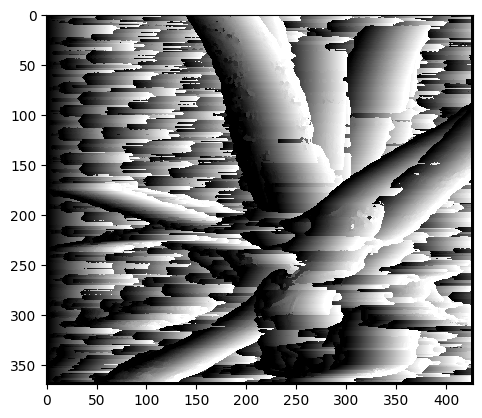

In [38]:
plt.imshow(depth_matrix,cmap='gray')

In [39]:
print(depth_matrix)

[[  0   0   0 ...  54   0   0]
 [  0   0   0 ...  57   0   0]
 [  0   0   0 ...  54   0   0]
 ...
 [  0   0   0 ... 189   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]


# Note:
Bởi vì L1 và L2 không có tính chất thay đổi theo tuyến tính, khi giá độ sáng của một hình ảnh được thay đổi theo A, có nghĩa là x+A thì khi đó độ dài của vector |x+A| sẽ thay đổi dẫn đến L1 và L2 sẽ không so sánh được khi 2 hình đó có cùng nội dung và khác độ sáng 

# Problem 4

In [26]:

def window_based_matching_cos(file_path, disparity_range = 64, kernel_size = 3, save_result = True ):
    left_img_path = os.path.join(file_path,"Aloe_left_1.png")

    right_img_path = os.path.join(file_path,"Aloe_right_2.png")
    left_img = cv2.imread(left_img_path,cv2.IMREAD_GRAYSCALE).astype(np.float32)
    right_img = cv2.imread(right_img_path,cv2.IMREAD_GRAYSCALE).astype(np.float32)
    height, width = left_img.shape
    depth_matrix = np.zeros((height,width),dtype=np.uint8)

    kernel_half = int(( kernel_size - 1 ) / 2 )
    scale = 3
    min_value = -1
    for h in range(kernel_half,height - kernel_half):
        for w in range(kernel_half,width - kernel_half):
            cost = []
            left_vector = left_img[(h - kernel_half) : (h + kernel_half + 1), (w - kernel_half) : (w + kernel_half + 1)].flatten()
            for d in range(disparity_range):
                if w - d - kernel_half < 0:
                    cost.append( min_value )
                else:
                    right_vector = right_img[(h - kernel_half) : (h + kernel_half + 1), (w - d - kernel_half) : (w - d + kernel_half + 1)].flatten()
                    cost.append(np.dot(left_vector,right_vector) / (np.linalg.norm(left_vector) * np.linalg.norm(right_vector)))
            depth_matrix[h,w] = np.argmax(cost) * scale
    if save_result:
        print('Save result...')
        cv2.imwrite (f'window_based_cosine.png', depth_matrix )
        cv2.imwrite (f'window_based_cosine_color.png', cv2.applyColorMap( depth_matrix , cv2.COLORMAP_JET ) )
        print('Done')
    return depth_matrix

In [28]:
depth_matrix = window_based_matching_cos(r"D:\Hoc\AIO2024\Image_depth\Aloe_images\Aloe", disparity_range = 64, save_result = True)

Save result...
Done
